In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e632494dd98e7fac91fec90318470826


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    time.sleep(1)
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | padang
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | lolua
City not found. Skipping...
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | horn lake
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | ankara
Processing Record 11 of Set 1 | boras
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | emerald
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | mwense
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | saint-claude
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | coihaique
Processing Record 21 of Set 1 | puerto narino
Processing Record 22 of Set 1 | chapleau
Proce

Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | kashin
Processing Record 42 of Set 4 | ereymentau
Processing Record 43 of Set 4 | klyavlino
Processing Record 44 of Set 4 | darhan
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | naples
Processing Record 47 of Set 4 | banda aceh
Processing Record 48 of Set 4 | isangel
Processing Record 49 of Set 4 | port blair
Processing Record 50 of Set 4 | general roca
Processing Record 1 of Set 5 | opoczno
Processing Record 2 of Set 5 | leningradskiy
Processing Record 3 of Set 5 | newport
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | wahran
City not found. Skipping...
Processing Record 6 of Set 5 | bilibino
Processing Record 7 of Set 5 | touros
Processing Record 8 of Set 5 | tecoanapa
Processing Record 9 of Set 5 | sri aman
Processing Record 10 of Set 5 | yar-sale
Processing Record 11 of Set 5 | falealupo
City not found. Skipping...
Processing Record 12 of Set 5 | huangzhou
Pr

Processing Record 29 of Set 8 | coquimbo
Processing Record 30 of Set 8 | trois-rivieres
Processing Record 31 of Set 8 | koupela
Processing Record 32 of Set 8 | atar
Processing Record 33 of Set 8 | ayagoz
Processing Record 34 of Set 8 | belmonte
Processing Record 35 of Set 8 | iacu
Processing Record 36 of Set 8 | yangambi
Processing Record 37 of Set 8 | urumqi
Processing Record 38 of Set 8 | cockburn town
Processing Record 39 of Set 8 | muros
Processing Record 40 of Set 8 | qaqortoq
Processing Record 41 of Set 8 | kayes
Processing Record 42 of Set 8 | matay
Processing Record 43 of Set 8 | kamaishi
Processing Record 44 of Set 8 | mahibadhoo
Processing Record 45 of Set 8 | mayumba
Processing Record 46 of Set 8 | richards bay
Processing Record 47 of Set 8 | vila do maio
Processing Record 48 of Set 8 | fairbanks
Processing Record 49 of Set 8 | labutta
City not found. Skipping...
Processing Record 50 of Set 8 | santiago de cao
Processing Record 1 of Set 9 | fort nelson
Processing Record 2 of

Processing Record 17 of Set 12 | sompeta
Processing Record 18 of Set 12 | goundam
Processing Record 19 of Set 12 | sinkat
City not found. Skipping...
Processing Record 20 of Set 12 | pucallpa
Processing Record 21 of Set 12 | devonport
Processing Record 22 of Set 12 | carbonia
Processing Record 23 of Set 12 | lorengau
Processing Record 24 of Set 12 | aykhal
Processing Record 25 of Set 12 | merauke
Processing Record 26 of Set 12 | ifanadiana
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | uyemskiy
Processing Record 29 of Set 12 | escarcega
Processing Record 30 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 31 of Set 12 | muncar
Processing Record 32 of Set 12 | leh
Processing Record 33 of Set 12 | mnogovershinnyy
Processing Record 34 of Set 12 | antanifotsy
Processing Record 35 of Set 12 | oranjemund
Processing Record 36 of Set 12 | general pico
Processing Record 37 of Set 12 | kembe
Processing Record 38 of Set 12 | penticton
Processing Recor

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Padang,-0.9492,100.3543,80.65,80,99,1.01,ID,2021-05-31 02:08:51
1,Mar Del Plata,-38.0023,-57.5575,50.00,67,0,11.99,AR,2021-05-31 02:08:53
2,La Ronge,55.1001,-105.2842,60.64,48,100,9.64,CA,2021-05-31 02:08:54
3,Narsaq,60.9167,-46.0500,43.02,69,11,2.48,GL,2021-05-31 02:08:56
4,Upernavik,72.7868,-56.1549,30.83,95,100,3.62,GL,2021-05-31 02:08:58
5,Horn Lake,34.9554,-90.0348,64.08,77,14,6.11,US,2021-05-31 02:08:59
6,New Norfolk,-42.7826,147.0587,51.93,49,89,3.24,AU,2021-05-31 02:09:00
7,Sao Joao Da Barra,-21.6403,-41.0511,72.57,96,100,7.94,BR,2021-05-31 02:09:01
8,Ankara,39.9199,32.8543,62.20,76,75,1.99,TR,2021-05-31 02:09:03
9,Boras,57.7210,12.9401,50.34,73,7,1.79,SE,2021-05-31 02:09:04


In [8]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [9]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Padang,ID,2021-05-31 02:08:51,-0.9492,100.3543,80.65,80,99,1.01
1,Mar Del Plata,AR,2021-05-31 02:08:53,-38.0023,-57.5575,50.00,67,0,11.99
2,La Ronge,CA,2021-05-31 02:08:54,55.1001,-105.2842,60.64,48,100,9.64
3,Narsaq,GL,2021-05-31 02:08:56,60.9167,-46.0500,43.02,69,11,2.48
4,Upernavik,GL,2021-05-31 02:08:58,72.7868,-56.1549,30.83,95,100,3.62
5,Horn Lake,US,2021-05-31 02:08:59,34.9554,-90.0348,64.08,77,14,6.11
6,New Norfolk,AU,2021-05-31 02:09:00,-42.7826,147.0587,51.93,49,89,3.24
7,Sao Joao Da Barra,BR,2021-05-31 02:09:01,-21.6403,-41.0511,72.57,96,100,7.94
8,Ankara,TR,2021-05-31 02:09:03,39.9199,32.8543,62.20,76,75,1.99
9,Boras,SE,2021-05-31 02:09:04,57.7210,12.9401,50.34,73,7,1.79


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

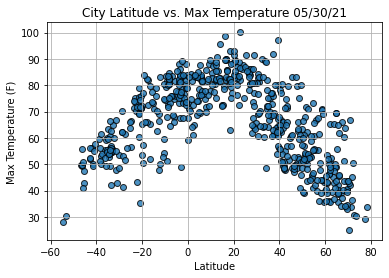

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

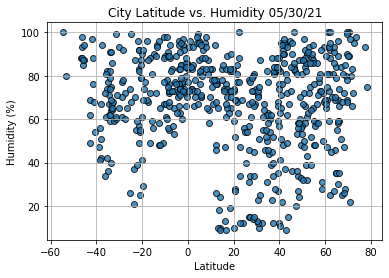

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

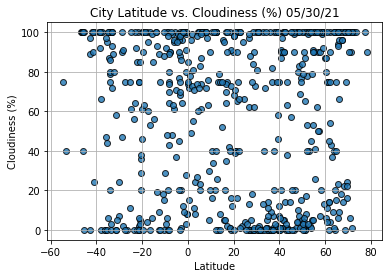

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

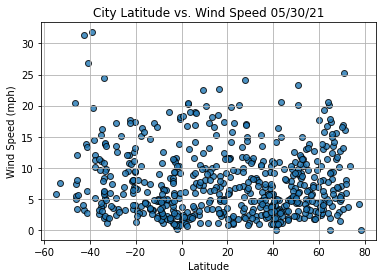

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()